In [2]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def get_audio_path(audio_dir, track_id):
    """
    Returns the path of the mp3 chosen
    """
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')

def get_tids_from_dir(audio_dir):
    """
    Gets all track ids from the mp3s in the directory
    """
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            #Adds all track ids while ignoring hidden files from os.walk
           tids.extend(int(file[:-4]) for file in files if not file[0] == '.')
    return tids

In [4]:
audio_dir = 'data/fma_small/'
tids = get_tids_from_dir(audio_dir)
len(tids)

2655

In [33]:
#Testing get_audio_path for later use
print(get_audio_path(audio_dir, 2096))

data/fma_small/002\002096.mp3


Plotting a single spectogram

c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


660984 22050
(128, 1291) 002\002096


c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


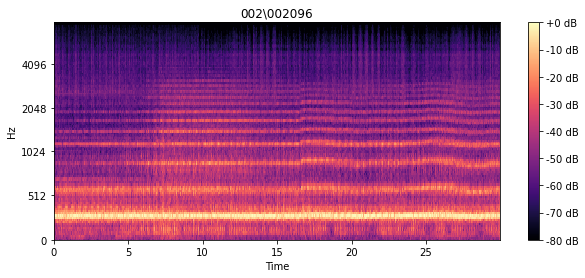

In [13]:
filename = get_audio_path(audio_dir, 2096)
y, sr = librosa.load(filename)
print(len(y),sr)

#Parsing filepath for genre number
each_file = filename.split('/')[-1]
genre_name = each_file.split('.')[0]

#Creating spectogram
spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)
spec = librosa.power_to_db(spec, ref=np.max)
print(spec.shape, genre_name)

#Plotting the spectogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title(str(genre_name))
plt.show();

In [31]:
#Testing the data frame
tracks = pd.read_csv('data/fma_metadata/tracks.csv', index_col=0, header=[0, 1])
tracks = tracks.loc[tracks[('set', 'subset')] == 'small']

tracks
# tracks.groupby(('track', 'genre_top'))

album                                                            \
         comments         date_created        date_released        engineer   
track_id                                                                      
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00             NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00             NaN   
140             1  2008-11-26 01:49:59  2007-05-22 00:00:00             NaN   
141             0  2008-11-26 01:49:57  2009-01-16 00:00:00             NaN   
...           ...                  ...                  ...             ...   
154308          0  2017-03-05 04:57:38  2017-03-05 00:00:00             NaN   
154309          0  2017-03-05 04:57:38  2017-03-05 00:00:00             NaN   
154413          0  2017-03-07 18:44:11                  NaN  Ernie Indradat   
154414          0  2017-03-07 18:44:11                  NaN  Ernie Indradat   
155066          0  2017-03-24 19:40:34  2017-03-24 00:00:00        JBlanked   

                                                                              \
         favorites     id                                        information   
track_id                                                                       
2                4      1                                            <p></p>   
5                4      1                                            <p></p>   
10               4      6                                                NaN   
140              1     61  <p>Alec K. Redfearn &amp; The Eyesores: Ellen ...   
141              1     60  <p>A full ensamble of strings, drums, electron...   
...            ...    ...                                                ...   
154308           0  22780                                                NaN   
154309           0  22780                                                NaN   
154413           0  22789  <p>A live performance at WFMU for Dark Night o...   
154414           0  22789  <p>A live performance at WFMU for Dark Night o...   
155066           1  22899  <p>Hip Hop, Old School type beat 2017, Trap Mu...   

                                                  \
         listens                        producer   
track_id                                           
2           6073                             NaN   
5           6073                             NaN   
10         47632                             NaN   
140         1300  Alec K. Refearn, Rob Pemberton   
141         1304                             NaN   
...          ...                             ...   
154308     22334                         Fleslit   
154309     22334                         Fleslit   
154413      3777                   Julie Bennack   
154414      3777                   Julie Bennack   
155066      4524                        JBlanked   

                                                             ...       track  \
                                                       tags  ... information   
track_id                                                     ...               
2                                                        []  ...         NaN   
5                                                        []  ...         NaN   
10                                                       []  ...         NaN   
140                                                      []  ...         NaN   
141                                                      []  ...         NaN   
...                                                     ...  ...         ...   
154308    ['fleslit', 'trap beat free use', 'trap beat f...  ...         NaN   
154309    ['fleslit', 'trap beat free use', 'trap beat f...  ...         NaN   
154413                                                   []  ...         NaN   
154414                                                   []  ...         NaN   
155066    ['old

In [44]:
filepath = 'data/fma_metadata/tracks.csv'

tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
keep_cols =  [('set', 'split'), ('set', 'subset'),('track', 'genre_top'), ('track', 'genres')]

all_tracks = tracks[keep_cols].loc[tracks[('set', 'subset')] == 'small']
all_tracks['track_id'] = all_tracks.index
#Was having issues with missing mp3s so just shortened the df to only contain the mp3 had
all_tracks = all_tracks.loc[all_tracks['track_id'].isin(tids)]

In [45]:
#Queries the first of each group (to get unique genres)
grouped_tracks = all_tracks.groupby(('track', 'genre_top')).first().reset_index()
grouped_tracks

track         set             track track_id
       genre_top       split subset     genres         
0     Electronic    training  small       [15]     3573
1   Experimental  validation  small       [32]     2012
2           Folk    training  small       [17]     2097
3        Hip-Hop    training  small       [21]     4682
4   Instrumental        test  small      [538]    10250
5  International    training  small  [46, 117]     3775
6            Pop    training  small       [76]     2099
7           Rock    training  small       [12]     3492

Plotting the spectograms for all genres

In [50]:
def create_spectogram(track_id, genre):
    filename = get_audio_path(audio_dir, track_id)
    y, sr = librosa.load(filename)
    print(len(y), sr)
    
    spec = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=1024)
    spec = librosa.power_to_db(spec, ref=np.max) 
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec, y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(genre))
    plt.show();

661560 22050


c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\bryancam\anaconda3\envs\aa\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


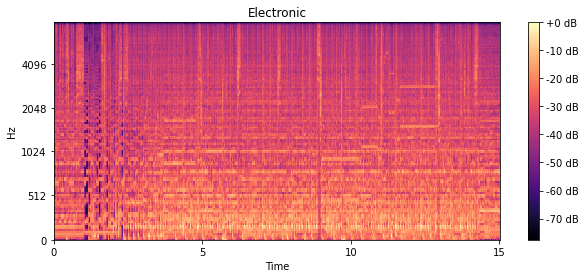

661560 22050


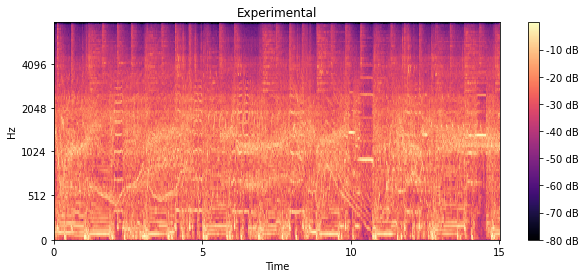

661560 22050


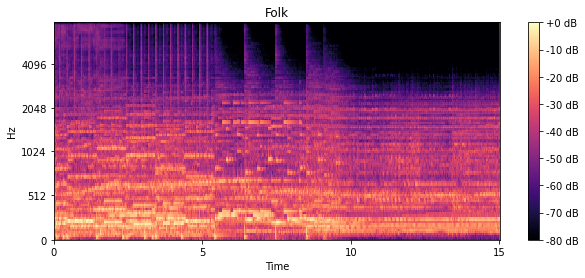

660984 22050


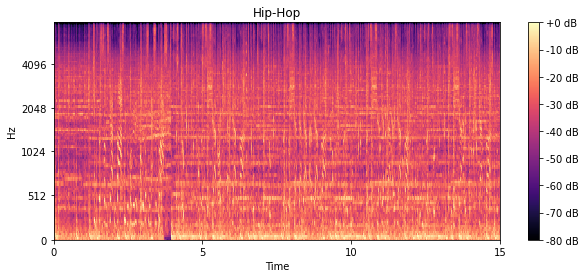

660984 22050


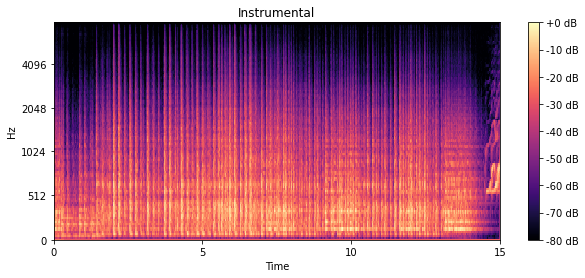

660984 22050


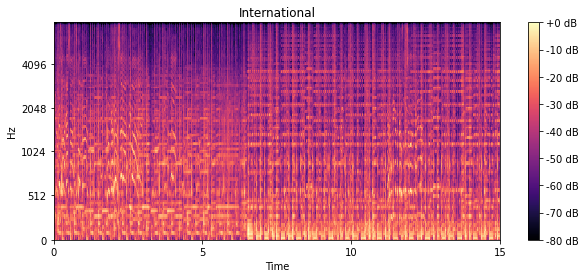

660984 22050


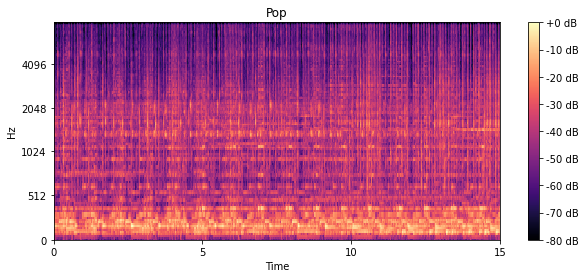

661560 22050


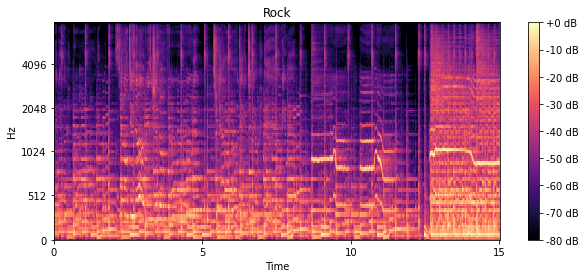

In [51]:
for index, row in grouped_tracks.iterrows():
    #Get track_id for create_spectogram function
    track_id = int(row['track_id'])
    genre = row['track','genre_top']
    #Create spectogram
    create_spectogram(track_id, genre)